#Data Preprocessing

In [53]:
#importing libraries
from sklearn.model_selection import train_test_split
import numpy as np
import os
import PIL
import cv2
import pickle

In [54]:
#mount drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Feature Extraction##

###Converting image data into array data

In [56]:
DATADIR = '/content/drive/MyDrive/dataset'
CATEGORIES = ["with mask", "without mask"]
IMG_SIZE = 64 
#The size of the image

#data input
X = []
#labels(0 or 1)
y = []


#function to create data from dataset directory
def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num_label = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                X.append(img_array)
                y.append(class_num_label)
            except Exeption as e:
                pass
            
create_data()

##Convert to Numpy##

###The data needs to be converted in computer readable form

In [107]:
SIZE = len(y)
data = np.array(X).flatten().reshape(SIZE, IMG_SIZE*IMG_SIZE) # pixel-features

# Turn X and y into numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE) # images
y = np.array(y) # target

print("Features, X shape: ", X.shape)
print("Target, y shape: ", y.shape)
print("Data shape: ", data.shape)

Features, X shape:  (4420, 64, 64)
Target, y shape:  (4420,)
Data shape:  (4420, 4096)


##Plot DataSet Image##

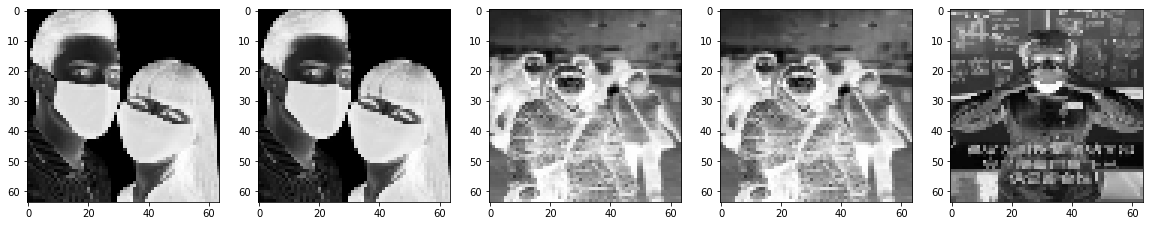

In [108]:
#import matplotlib.image as mpimg
import matplotlib.pyplot as plt # to plot inage, graph
%matplotlib inline

#drawing input images
plt.figure(figsize=(20,10))
col =5
for i in range(5):
    plt.subplot(5 / col + 1, col, i + 1)
    plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')
    #image = mpimg.imread(X[i])
    #plt.imshow(image)
    #plt.show()

##Save Dataset as Pickles##

###Pickle is used to tackle the scenario of regenerating data again and again

In [59]:
#Saves us from having to regenerate our data by saving our data
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("data.pickle", "wb")
pickle.dump(data, pickle_out)
pickle_out.close()

##Load Pickles##

In [60]:

#Loading pickles using open
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in)

##Total Classification Counts##

In [61]:
print('Number of Samples:', len(y))
print('Number of Masked samples:', (y == 0).sum())
print('Number of Unmasked samples:', (y == 1).sum())

Number of Samples: 4420
Number of Masked samples: 2092
Number of Unmasked samples: 2328


##Split Train and Test##

In [62]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)


In [63]:
print('Length of Training data: ',len(X_train), '\nLength of Testing data: ',len(X_test))

Length of Training data:  2210 
Length of Testing data:  2210


#KNN

##Imports##

In [64]:
# import packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA # Dimensionality Reduction

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot inage, graph

import pickle
import time # for computation time assessment
%matplotlib inline

##Prepare Dataset##

In [65]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in) # Data Matrix will serve as X

##Dataset Classification Distribution##

In [66]:
print('Number of Samples:', len(y))
print('Number of Masked samples:', (y == 0).sum())
print('Number of UnMasked samples:', (y == 1).sum())

Number of Samples: 4420
Number of Masked samples: 2092
Number of UnMasked samples: 2328


##Converting Numpy to Dataframe##

In [67]:

# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Label"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6  ... P4089 P4090 P4091 P4092 P4093 P4094 P4095
0  255  255  255  255  255  255  255  ...    33    29    51    52    45    41    41
1  255  255  255  255  255  255  255  ...    33    29    51    52    45    41    41
2  202  200  200  200  201  201  201  ...    49   116   118   123   125   124   119
3  202  200  200  200  201  201  201  ...    49   116   118   123   125   124   119
4  150  156  161  159  157  151  159  ...   160   158   159   158   159   159   158

[5 rows x 4096 columns]
   Label
0      0
1      0
2      0
3      0
4      0


##Data Shape##

In [68]:

# Shape
print('\nImage Data Shape:', X.shape)
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (4420, 4096)
Image Data Shape Features: (4420, 4096)
Image Data Shape Target: (4420, 1)



##Normalize the Data

In [69]:
X = X / 255.0

##Split Train + Test, random_state

In [70]:

# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  2210 
Length of our Testing data:  2210


##KNN Model

In [71]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Use training data to fit KNN model
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
%%time
# make prediction on entire test data
predictions_set1 = knn.predict(X_test)

CPU times: user 35.9 s, sys: 22.5 ms, total: 35.9 s
Wall time: 35.8 s


In [73]:
# Save Predictions in a pickle
pickle_out = open("predictions_set1.pickle", "wb")
pickle.dump(predictions_set1, pickle_out)
pickle_out.close()

##Performance Metrics 

In [74]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test, predictions_set1))

KNN Accuracy: 0.914


Text(0.5, 1.0, 'Accuracy Score: 0.9135746606334841')

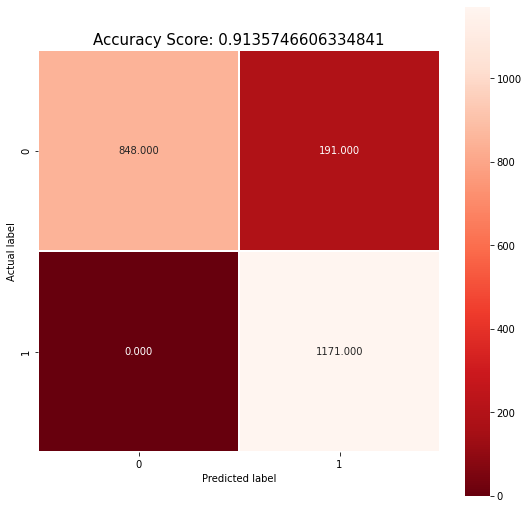

In [75]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set1)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set1))
plt.title(all_sample_title,size=15)

##Precision, Recall, F1 Score & Classification Report##

In [76]:
print('KNN Precision: %.3f' % precision_score(y_test, predictions_set1, average='micro'))
print('KNN Recall: %.3f' % recall_score(y_test, predictions_set1, average='micro'))
print('KNN F1 Score: %.3f' % f1_score(y_test, predictions_set1, average='micro'))
print("\nNo Hyperparameter Tuning Classification Report\n", classification_report(y_test, predictions_set1))

KNN Precision: 0.914
KNN Recall: 0.914
KNN F1 Score: 0.914

No Hyperparameter Tuning Classification Report
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      1039
           1       0.86      1.00      0.92      1171

    accuracy                           0.91      2210
   macro avg       0.93      0.91      0.91      2210
weighted avg       0.93      0.91      0.91      2210



#SVM

##Import Packages

In [109]:
# For data management
import pandas as pd
import numpy as np
import pickle

from sklearn import svm
from sklearn import metrics

from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

##Load dataset

In [110]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

##Test train split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

##Model Building

In [112]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
model_100 = svm.SVC()
model_100.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##Model Evaluation

In [113]:
# 1. Get and print a baseline accuracy score.
nsamples1, nx1, ny1 = X_test.shape
X_test = X_test.reshape((nsamples1,nx1*ny1))
y_pred = model_100.predict(X_test)
accuracy = model_100.score(X_test, y_test)
print("Accuracy %f" % accuracy)
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

Accuracy 0.991855


0.9918552036199095

In [114]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       1.00      0.99      0.99      1169

    accuracy                           0.99      2210
   macro avg       0.99      0.99      0.99      2210
weighted avg       0.99      0.99      0.99      2210



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       1.00      0.99      0.99      1169

    accuracy                           0.99      2210
   macro avg       0.99      0.99      0.99      2210
weighted avg       0.99      0.99      0.99      2210



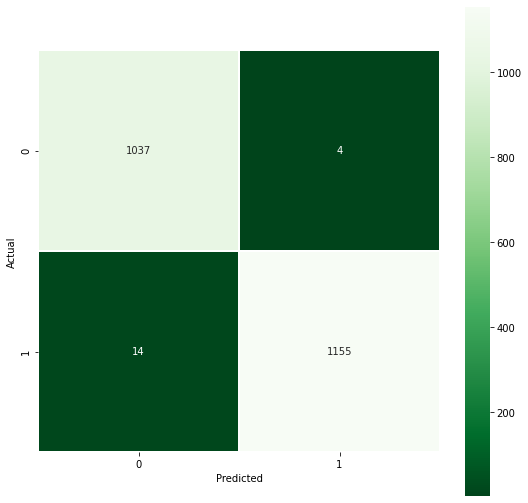

In [116]:
svm_cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 9))
sns.heatmap(svm_cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Greens_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')

print(sklearn.metrics.classification_report(y_test, y_pred))

#CNN

##Import Packages

In [83]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import sklearn
from sklearn.model_selection import train_test_split
import cv2

import seaborn as sns
import pickle
import os

##Load in the dataset that was preprocessed from local directory

In [84]:
# Load in the files from Google Drive 

filename = '/content/X.pickle'
pickle_in = open(filename, 'rb')
X = pickle.load(pickle_in)

filename = '/content/y.pickle'
pickle_in = open(filename, 'rb')
y = pickle.load(pickle_in)

CATEGORIES = ['masked', 'unmasked']

In [89]:
resized_X = []
for img in X:
    resized_X.append(cv2.resize(img, (64, 64)))

In [90]:
X = np.asarray(resized_X)
X = X.reshape(-1, 64, 64, 1)
print(X.shape)

(4420, 64, 64, 1)


In [91]:
X = X / 255.0

In [92]:
IMG_DIM = X.shape[1]
print('IMG_DIM:',IMG_DIM)

IMG_DIM: 64


In [93]:
# Split dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
print('Training Size:', len(X_train))
print('Testing  Size:', len(X_test))

Training Size: 3536
Testing  Size: 884


In [95]:
cnn_model = tensorflow.keras.models.Sequential()

In [96]:
# Start of Convolution Layers & Maxpooling
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

# Start of Neural Nets
cnn_model.add(tensorflow.keras.layers.Flatten())

cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

In [97]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)       

In [98]:
# Compile the Model
cnn_model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [100]:
# Train Model
epochs = 5
cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/5
100/100 [==============================] - 92s 923ms/step - loss: 0.5664 - acc: 0.6534 - val_loss: 0.2489 - val_acc: 0.9322
Epoch 2/5
100/100 [==============================] - 92s 919ms/step - loss: 0.1038 - acc: 0.9714 - val_loss: 0.0479 - val_acc: 0.9915
Epoch 3/5
100/100 [==============================] - 91s 915ms/step - loss: 0.0416 - acc: 0.9877 - val_loss: 0.0118 - val_acc: 0.9972
Epoch 4/5
100/100 [==============================] - 91s 909ms/step - loss: 0.0379 - acc: 0.9906 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 5/5
100/100 [==============================] - 90s 903ms/step - loss: 0.0065 - acc: 0.9981 - val_loss: 1.2842e-04 - val_acc: 1.0000


In [101]:
# Evaluate performance
cnn_model.evaluate(X_test, y_test)

28/28 [==============================] - 6s 214ms/step - loss: 2.3873e-04 - acc: 1.0000


[0.00023872744350228459, 1.0]

In [102]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       475

    accuracy                           1.00       884
   macro avg       1.00      1.00      1.00       884
weighted avg       1.00      1.00      1.00       884



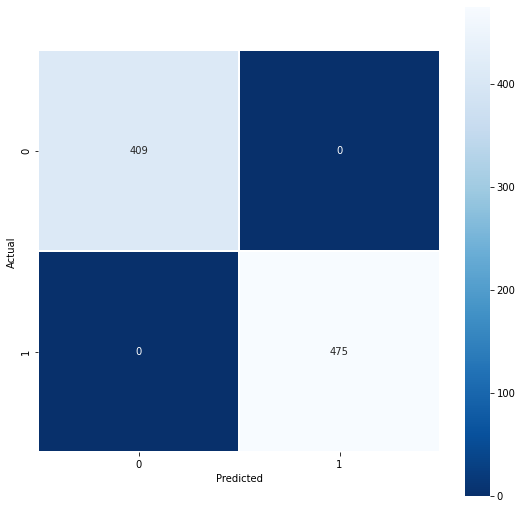

In [103]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')

print(sklearn.metrics.classification_report(y_test, y_pred))